## Dataset exploration

In [ ]:
!pip install scikeras
!pip install tensorflow scikit-learn

!pip install -U scikit-learn==1.5.1 scikeras==0.13.0

import pandas as pd
import matplotlib.pyplot as plt
from numpy import*
from sklearn import*


# sklearn 10FCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split


# Keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
!unzip /content/drive/MyDrive/Dublin_study/DL/covid.zip

In [ ]:
from PIL import Image
import glob

Mask folder that is present in each class folder will not be used as it is for segmentation tasks and we are only doing classification

## **Class	Description**
COVID-19:	X-ray with COVID-19.
Normal: no infection.


Lung Opacity	Non-COVID infections showing opacities in lungs (e.g. “lung infection” / non-COVID pneumonia)

Viral Pneumonia	Pneumonia caused by viruses (non-COVID viruses)

In [ ]:
import glob

image_count = glob.glob('/content/COVID-19_Radiography_Dataset/COVID/images/*.png')
print("Total images with covid label:", len(image_count))

Total images with covid label: 3616


In [ ]:
import os
from collections import Counter
# confirming all files in folder are .png no other image file type
folder = "/content/COVID-19_Radiography_Dataset/COVID/images"

extensions = [os.path.splitext(f)[1].lower() for f in os.listdir(folder)]
counts = Counter(extensions)

print(counts)


Counter({'.png': 3616})


In [ ]:
import glob

image_count = glob.glob('/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/*.png')
print("Total images with Lung opacity (non-covid) label:", len(image_count))

Total images with Lung opacity (non-covid) label: 6012


In [ ]:
import os
from collections import Counter
# confirming all files in folder are .png no other image file type
folder = "/content/COVID-19_Radiography_Dataset/Lung_Opacity/images"

extensions = [os.path.splitext(f)[1].lower() for f in os.listdir(folder)]
counts = Counter(extensions)

print(counts)


Counter({'.png': 6012})


In [ ]:
import glob

image_count = glob.glob('/content/COVID-19_Radiography_Dataset/Normal/images/*.png')
print("Total images with Normal (no-infection) label:", len(image_count))

Total images with Normal (no-infection) label: 10192


In [ ]:
import os
from collections import Counter
# confirming all files in folder are .png no other image file type
folder = "/content/COVID-19_Radiography_Dataset/Normal/images"

extensions = [os.path.splitext(f)[1].lower() for f in os.listdir(folder)]
counts = Counter(extensions)

print(counts)


Counter({'.png': 10192})


In [ ]:
import glob

image_count = glob.glob('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/*.png')
print("Total images with Normal (no-infection) label:", len(image_count))

Total images with Normal (no-infection) label: 1345


In [ ]:
import os
from collections import Counter
# confirming all files in folder are .png no other image file type
folder = "/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"

extensions = [os.path.splitext(f)[1].lower() for f in os.listdir(folder)]
counts = Counter(extensions)

print(counts)


Counter({'.png': 1345})


**clear class imbalance, will address later using techniques from other papers with small dummy model code**

### Image shape and resizing

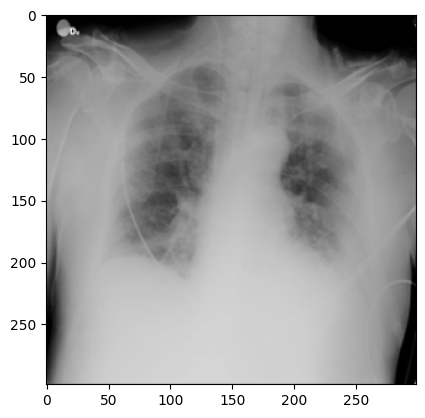

In [ ]:
import os
import glob
from PIL import Image

myImage =  Image.open("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png")


plt.imshow(myImage,cmap = 'gray')
plt.show()

In [ ]:
print(myImage.size)

(299, 299)


All images are 399x399 pixels

Source for resizing width and height: https://www.nature.com/articles/s41598-024-61693-0?

"Resizing the images is an essential process to satisfy the requirement of CNN of equally sized input images. In this research, the process of resizing X-ray images has been done to fit all X-ray images to the input size of the used pre-trained CNN models which are VGG19 and EfficientNetB0. Therefore, all images’ versions either full or segmented versions were resized to fit the CNNs input image size which is 224 × 224 pixels"

In [ ]:
w = 112 # only for data preprocessing to ease with code
h = 112


X = []
Y=[]

for item in os.listdir("/content/COVID-19_Radiography_Dataset/COVID/images"):
    img_path = os.path.join('/content/COVID-19_Radiography_Dataset/COVID/images',item)
    im = Image.open(img_path)
    img = im.resize((w,h), Image.Resampling.LANCZOS)# the resampling part does antialiasing but package name changed
    img=img.convert('L')
    X.append(img)
    Y.append(0)

newImages_1 = []

for item in os.listdir("/content/COVID-19_Radiography_Dataset/Lung_Opacity/images"):
    img_path = os.path.join('/content/COVID-19_Radiography_Dataset/Lung_Opacity/images', item)
    im = Image.open(img_path)
    img = im.resize((w,h),Image.Resampling.LANCZOS)
    img=img.convert('L')
    X.append(img)
    Y.append(1)

for item in os.listdir("/content/COVID-19_Radiography_Dataset/Normal/images"):
    img_path = os.path.join('/content/COVID-19_Radiography_Dataset/Normal/images', item)
    im = Image.open(img_path)
    img = im.resize((w,h),Image.Resampling.LANCZOS)
    img=img.convert('L')
    X.append(img)
    Y.append(2)

for item in os.listdir("/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"):
    img_path = os.path.join('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images', item)
    im = Image.open(img_path)
    img = im.resize((w,h),Image.Resampling.LANCZOS)
    img=img.convert('L')
    X.append(img)
    Y.append(3)

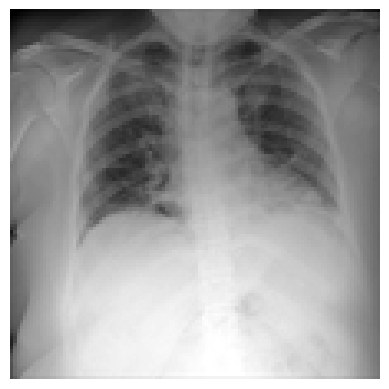

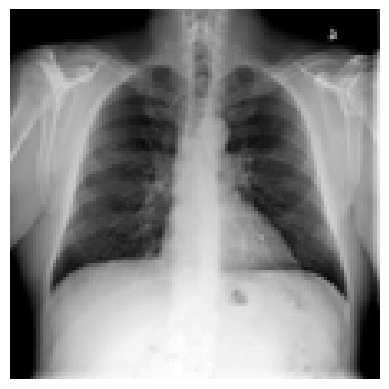

In [ ]:
import matplotlib.pyplot as plt


plt.imshow(X[0], cmap="gray")

plt.axis("off")
plt.show()

plt.imshow(X[11000], cmap="gray")
plt.axis("off")
plt.show()


In [ ]:
print(len(X))

21165


## Image enhancement code, the same resizing block of code is being reused from above so you only need to run one of them, there is one per image technique or you can use the above one that is the orignial**

Patel et al. (2020)  The models of
interest include BBHE, and RMSHE, an enhanced method that recursively decomposes

proposed pipeline uses clahe to improve image: https://pmc.ncbi.nlm.nih.gov/articles/PMC10728198/


They use CLAHE in a COVID detection pipeline and report improved classifier performance after applying CLAHE as preprocessing. https://pmc.ncbi.nlm.nih.gov/articles/PMC10792799/

they compare  contrast methods and references CLAHE as a competitive baseline for improving CXR classification performance. https://www.sciencedirect.com/science/article/pii/S0030402623002474

tested many histogram equalizations but on brain mri not chest x-ray (still applicable),"  We observe that
BBHE algorithm preserves brightness of the image to a
certain extent but the improved version of BBHE is RMSHE
that gives better results as observed on the basis of various
parameters." https://arxiv.org/abs/2003.06615


shows improvment of performance using both lpt and dwt over just one and over none, in brain mri not in chest x-ray but still medical so worth testing https://www.mdpi.com/2227-9032/10/9/1801

Shows that LPT + similar wavelet transformation (DTCWT) are robust against rotation & scaling  https://pubmed.ncbi.nlm.nih.gov/37112182/



###   BBHE
https://pypi.org/project/image-enhancement/

In [ ]:
!pip install image-enhancement

  Preparing metadata (setup.py) ... done
  Created wheel for image-enhancement: filename=image_enhancement-0.2.1-py3-none-any.whl size=13356 sha256=b9696700371eb7674978be43f9c4a278ecab69d7a6dc22b435d0f9ca204111fd
  Stored in directory: /root/.cache/pip/wheels/75/fc/8b/0c08f18c66770ed1e7b5ec3482f1ede13af3054c9f30ccaa03
Successfully built image-enhancement


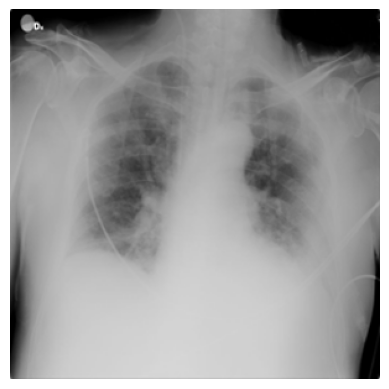

shape of image after bbhe: (112, 112)


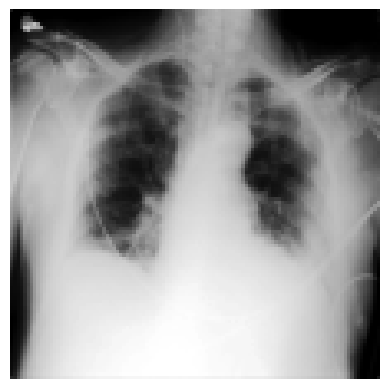

In [ ]:
import os
import numpy as np
from skimage.transform import resize
import cv2 as cv
from image_enhancement import image_enhancement

def load_bbhe_one_image(impath, newsize=112):
    # Load image with OpenCV (BGR)
    input_image = cv.imread(impath)

    # Apply BBHE (HSV-based enhancement)
    ie = image_enhancement.IE(input_image, 'HSV')
    output_image = ie.BBHE()

    # Convert BBHE result to numpy & grayscale
    output_image = cv.cvtColor(output_image, cv.COLOR_BGR2GRAY)

    # Resize to desired size
    output_image = resize(output_image, (newsize, newsize),
                          preserve_range=True)

    return output_image.astype("float32")

    # Example usage
normal = cv.imread("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png")

import matplotlib.pyplot as plt

plt.imshow(normal, cmap='gray') # Displaying in grayscale
plt.axis('off') # Hide axis
plt.show()

one = load_bbhe_one_image("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png")
print("shape of image after bbhe:",one.shape)

plt.imshow(one, cmap='gray') # Displaying in grayscale
plt.axis('off') # Hide axis
plt.show()

In [ ]:
w = 112
h = 112

X = []
Y = []

# COVID class
for item in os.listdir("/content/COVID-19_Radiography_Dataset/COVID/images"):
    path = f"/content/COVID-19_Radiography_Dataset/COVID/images/{item}"
    img = load_bbhe_one_image(path, newsize=w)
    X.append(img)
    Y.append(0)

# Lung Opacity
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Lung_Opacity/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/{item}"
    img = load_bbhe_one_image(path, newsize=w)
    X.append(img)
    Y.append(1)

# Normal
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Normal/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Normal/images/{item}"
    img = load_bbhe_one_image(path, newsize=w)
    X.append(img)
    Y.append(2)

# Viral Pneumonia
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/{item}"
    img = load_bbhe_one_image(path, newsize=w)
    X.append(img)
    Y.append(3)

### RMSHE
https://pypi.org/project/image-enhancement/

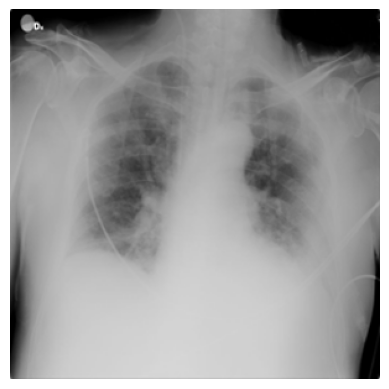

shape of image after rmshe: (112, 112)


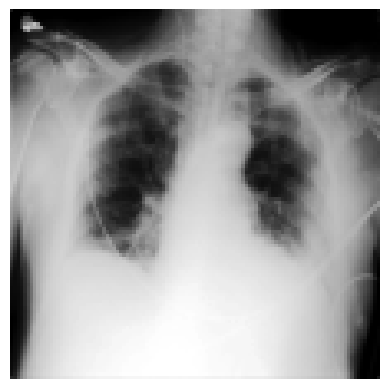

In [ ]:
import numpy as np
from skimage.transform import resize
import cv2 as cv
from image_enhancement import image_enhancement

def load_rmshe_one_image(impath, newsize=112):
    # Load image with OpenCV (BGR)
    input_image = cv.imread(impath)

    # Apply RMSHE enhancement (HSV-based)
    ie = image_enhancement.IE(input_image, 'HSV')
    output_image = ie.RMSHE(recursive=True)

    # Convert to grayscale
    output_image = cv.cvtColor(output_image, cv.COLOR_BGR2GRAY)

    # Resize to desired size
    output_image = resize(output_image, (newsize, newsize),
                          preserve_range=True)

    return output_image.astype("float32")


    # Example usage
normal = cv.imread("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png")

import matplotlib.pyplot as plt

plt.imshow(normal, cmap='gray') # Displaying in grayscale
plt.axis('off') # Hide axis
plt.show()

one = load_rmshe_one_image("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png")
print("shape of image after rmshe:",one.shape)

plt.imshow(one, cmap='gray') # Displaying in grayscale
plt.axis('off') # Hide axis
plt.show()

In [ ]:
w = 112
h = 112

X = []
Y = []

# COVID class
for item in os.listdir("/content/COVID-19_Radiography_Dataset/COVID/images"):
    path = f"/content/COVID-19_Radiography_Dataset/COVID/images/{item}"
    img = load_rmshe_one_image(path, newsize=w)
    X.append(img)
    Y.append(0)

# Lung Opacity
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Lung_Opacity/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/{item}"
    img = load_rmshe_one_image(path, newsize=w)
    X.append(img)
    Y.append(1)

# Normal
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Normal/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Normal/images/{item}"
    img = load_rmshe_one_image(path, newsize=w)
    X.append(img)
    Y.append(2)

# Viral Pneumonia
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/{item}"
    img = load_rmshe_one_image(path, newsize=w)
    X.append(img)
    Y.append(3)

### CLAHE
https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

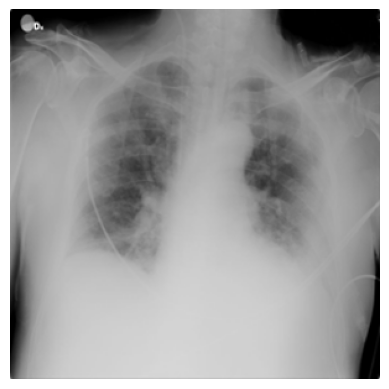

shape of image after clahe: (112, 112)


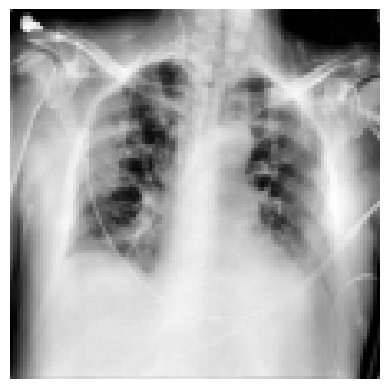

In [ ]:
import cv2 as cv
import numpy as np
from skimage.transform import resize

def load_clahe_one_image(impath, newsize=112):

    img = cv.imread(impath, cv.IMREAD_GRAYSCALE)


    clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))

    # Apply CLAHE
    img_clahe = clahe.apply(img)

    # Resize to model size
    img_clahe = resize(img_clahe, (newsize, newsize), preserve_range=True)

    return img_clahe.astype("float32")


# Example usage
normal = cv.imread("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png")

import matplotlib.pyplot as plt

plt.imshow(normal, cmap='gray') # Displaying in grayscale
plt.axis('off') # Hide axis
plt.show()

one = load_clahe_one_image("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png")
print("shape of image after clahe:",one.shape)

plt.imshow(one, cmap='gray') # Displaying in grayscale
plt.axis('off') # Hide axis
plt.show()

In [ ]:
w = 112
h = 112

X = []
Y = []

# COVID class
for item in os.listdir("/content/COVID-19_Radiography_Dataset/COVID/images"):
    path = f"/content/COVID-19_Radiography_Dataset/COVID/images/{item}"
    img = load_clahe_one_image(path, newsize=w)
    X.append(img)
    Y.append(0)

# Lung Opacity
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Lung_Opacity/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/{item}"
    img = load_clahe_one_image(path, newsize=w)
    X.append(img)
    Y.append(1)

# Normal
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Normal/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Normal/images/{item}"
    img = load_clahe_one_image(path, newsize=w)
    X.append(img)
    Y.append(2)

# Viral Pneumonia
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/{item}"
    img = load_clahe_one_image(path, newsize=w)
    X.append(img)
    Y.append(3)


### LPT (LOG-POLAR TRANSFORMATION) and DWT (DISCRETE WAVELET TRANSFOR)


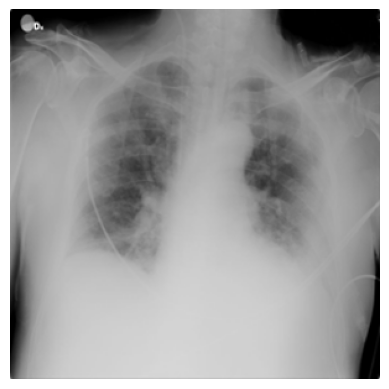

shape of image after clahe: (112, 112)


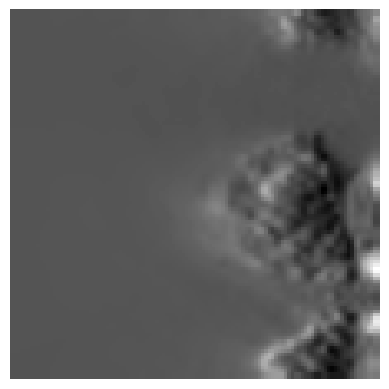

In [ ]:
from skimage.io import imread
from skimage.transform import resize, warp_polar
from skimage.color import rgb2gray
import numpy as np
import pywt
import cv2 as cv

def load_lpt_dwt_one_image(impath, newsize=112):
    """
    LPT + DWT Image Enhancement
    Steps:
      1. Read image
      2. Convert to grayscale if needed
      3. Resize to square
      4. Apply Log-Polar Transform
      5. Apply DWT (Haar)
      6. Extract horizontal detail band
      7. Resize detail subband back to newsize x newsize
    """

    # Load the image
    im = imread(impath)

    # Convert color → grayscale
    if len(im.shape) == 3 and im.shape[2] == 3:
        im = rgb2gray(im)
    elif len(im.shape) != 2:
        raise ValueError("Unsupported image format")

    # Resize
    im = resize(im, (newsize, newsize))

    # Log-Polar Transform
    im = warp_polar(
        im,
        radius=newsize/2,
        output_shape=(newsize, newsize),
        scaling='log'
    )

    # Discrete Wavelet Transform (DWT)
    coeffs = pywt.wavedec2(im, wavelet="haar", level=1)

    # Extract horizontal detail subband
    horizontal_detail = coeffs[1][1]

    # Resize detail band to final size
    im = resize(horizontal_detail, (newsize, newsize))

    return im


# Example usage
normal = cv.imread("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png")

import matplotlib.pyplot as plt

plt.imshow(normal, cmap='gray') # Displaying in grayscale
plt.axis('off') # Hide axis
plt.show()

one = load_lpt_dwt_one_image("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png")
print("shape of image after clahe:",one.shape)

plt.imshow(one, cmap='gray') # Displaying in grayscale
plt.axis('off') # Hide axis
plt.show()

In [ ]:
w = 112
h = 112

X = []
Y = []

# COVID class
for item in os.listdir("/content/COVID-19_Radiography_Dataset/COVID/images"):
    path = f"/content/COVID-19_Radiography_Dataset/COVID/images/{item}"
    img = load_lpt_dwt_one_image(path, newsize=w)
    X.append(img)
    Y.append(0)

# Lung Opacity
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Lung_Opacity/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/{item}"
    img = load_lpt_dwt_one_image(path, newsize=w)
    X.append(img)
    Y.append(1)

# Normal
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Normal/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Normal/images/{item}"
    img = load_lpt_dwt_one_image(path, newsize=w)
    X.append(img)
    Y.append(2)

# Viral Pneumonia
for item in os.listdir("/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"):
    path = f"/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/{item}"
    img = load_lpt_dwt_one_image(path, newsize=w)
    X.append(img)
    Y.append(3)


### Continuation after image enhancement techniques

NP array Conversion

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from PIL import Image
import glob

In [ ]:
# Convert to NP array
X = np.array(X)


# reshape to be [samples][channels][width][height]
X = X.reshape(X.shape[0], w, h, 1).astype('float32')

# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]


Y = to_categorical(Y)
num_classes = Y.shape[1]

batch processing and data generator


In [ ]:
# Tensorflow 2
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
%matplotlib inline
import time

from PIL import Image
import glob
from sklearn.model_selection import train_test_split


**Steps taken to reduce class imbalance**

1- Implementing class weighting

2- stratified sampling

3- data augmentation only on training not validation

papers:

1- https://pmc.ncbi.nlm.nih.gov/articles/PMC9422401/ they applied a class-weighted categorical cross-entropy loss and also data augmentation on only training . Class weights was best perfroming

2- https://www.nature.com/articles/s41598-023-45532-2 similar yet slightly different data augmentation

3- https://pubmed.ncbi.nlm.nih.gov/34305440/ did data augmentation as part of training pipeline so training only

4- https://pmc.ncbi.nlm.nih.gov/articles/PMC8907145/? did data augmentation

5- https://www.mdpi.com/1424-8220/23/4/2333 for stratified sampling



Ethical reason to not do oversampling in medical field:
https://pmc.ncbi.nlm.nih.gov/articles/PMC10789107/

Paper argues that When synthetic images are generated, there is a risk that they contain visual patterns that do not correspond to real medical pathology. A model might learn these artifacts instead of actual COVID-19 or pneumonia features which could lead it to perfrom "well" but fail on real patients.A radiologist must inspect samples and validate that they are medically sound to use as training

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.model_selection import train_test_split
# fix random seed
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)



# stratified sampling done
Y_int = np.argmax(Y, axis=1)

X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, stratify=Y_int, random_state=1
)


# compute class weights
y_train_int = np.argmax(Y_train, axis=1)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_int),
    y=y_train_int
)
class_weights = {i: w for i, w in enumerate(class_weights)}

print("Class weights:", class_weights)

# Augmentation for TRAINING ONLY
train_datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# 2. NO AUGMENTATION for validation
val_datagen = ImageDataGenerator()

train_datagen.fit(X_train)

train_batches = train_datagen.flow(X_train, Y_train, batch_size=32)
val_batches   = val_datagen.flow(X_val, Y_val, batch_size=32)


**Please note the class_weight hyperparameter in the model**

# tests with final model
 adjusting of above code with martin code

### Testing of model with 112x112 size,
image sizes from above is 112 and below model will take 112

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (112, 112)
BATCH_SIZE = 64

# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
    validation_split=0.2  # 20% validation split
)

train_gen = train_datagen.flow_from_directory(
    'COVID-19_Radiography_Dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = train_datagen.flow_from_directory(
    'COVID-19_Radiography_Dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)


Found 33866 images belonging to 4 classes.
Found 8464 images belonging to 4 classes.


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class counts from the directory
classes = train_gen.classes
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(classes),
    y=classes
)
class_weights = dict(enumerate(class_weights_array))
print("Class weights:", class_weights)

Class weights: {0: np.float64(1.4632734185966125), 1: np.float64(0.8800935550935551), 2: np.float64(0.5191623742948246), 3: np.float64(3.9342472118959106)}


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Input, Activation
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC



In [ ]:
# Project configuration
DATA_DIR = 'COVID-19_Radiography_Dataset'
IMG_SIZE = (112, 112)
BATCH_SIZE = 64
NUM_CLASSES = 4
CLASS_NAMES = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']
EPOCHS = 30
LEARNING_RATE = 0.001
RANDOM_SEED = 42

# Create directories for saving results
os.makedirs('models', exist_ok=True)
os.makedirs('figures', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Set random seeds
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
def build_cnn(num_classes, img_size):

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(*img_size, 3)),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    print(f"Simple CNN built with {model.count_params():,} parameters")
    return model

simple_cnn_model = build_cnn(NUM_CLASSES, IMG_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Simple CNN built with 421,828 parameters


In [ ]:
def compile_model(model, learning_rate=0.001):
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
    )
    return model

def get_callbacks(model_name):
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
        ModelCheckpoint(f'models/best_{model_name}.keras', monitor='val_accuracy', save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
        CSVLogger(f'results/{model_name}_training.csv')
    ]
    return callbacks

In [ ]:
# Compile Simple CNN
simple_cnn_model = compile_model(simple_cnn_model, LEARNING_RATE)

# Train Simple CNN
print("Training CNN...")
cnn_history = simple_cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks('simple_cnn'),
    class_weight=class_weights,
    verbose=1
)
print("CNN training completed!")

Training CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 241s 432ms/step - accuracy: 0.2123 - auc: 0.4970 - loss: 1.3774 - precision: 0.2188 - recall: 0.0019 - val_accuracy: 0.4259 - val_auc: 0.6780 - val_loss: 1.2732 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 199s 375ms/step - accuracy: 0.4144 - auc: 0.7135 - loss: 1.0887 - precision: 0.5371 - recall: 0.0651 - val_accuracy: 0.3796 - val_auc: 0.6617 - val_loss: 1.3543 - val_precision: 0.3103 - val_recall: 0.0638 - learning_rate: 0.0010
Epoch 3/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 205s 387ms/step - accuracy: 0.4660 - auc: 0.7490 - loss: 0.9898 - precision: 0.5810 - recall: 0.1216 - val_accuracy: 0.4851 - val_auc: 0.7411 - val_loss: 1.1639 - val_precision: 0.4496 - val_recall: 0.0764 - learning_rate: 0.0010
Epoch 4/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 199s 375ms/step - accuracy: 0.5256 - auc: 0.7872 - loss: 0.9263 - precision: 0.6413 - recall: 0.2309 - val_accuracy: 0.5005 - val_auc: 0.7421 

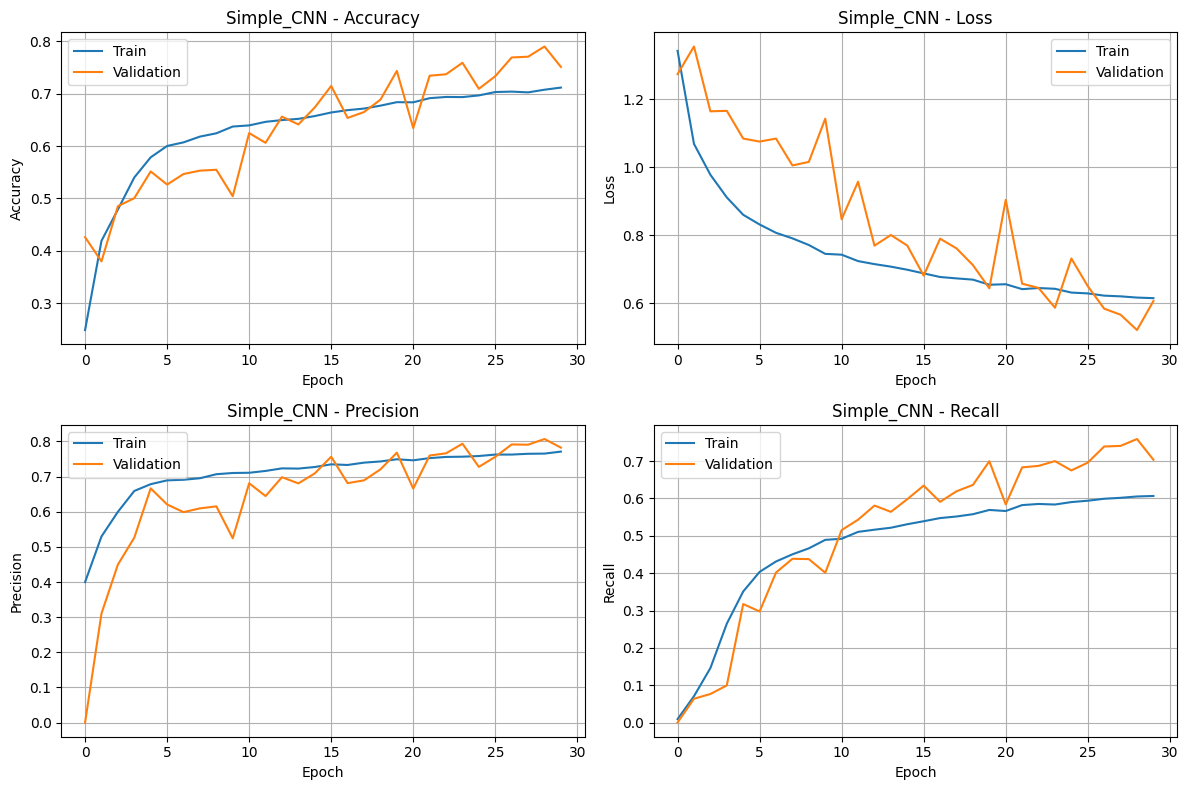

In [ ]:
def plot_training_history(history, model_name):
    """Plot training history for a model"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
    axes[0, 0].set_title(f'{model_name} - Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train')
    axes[0, 1].plot(history.history['val_loss'], label='Validation')
    axes[0, 1].set_title(f'{model_name} - Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train')
    axes[1, 0].plot(history.history['val_precision'], label='Validation')
    axes[1, 0].set_title(f'{model_name} - Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Train')
    axes[1, 1].plot(history.history['val_recall'], label='Validation')
    axes[1, 1].set_title(f'{model_name} - Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.savefig(f'figures/{model_name}_training_history.png', dpi=150)
    plt.show()

# Plot training histories
plot_training_history(cnn_history, 'Simple_CNN')

### Testing of model with RMSHE (112x112)

In [ ]:
!pip install image-enhancement

  Preparing metadata (setup.py) ... done
  Created wheel for image-enhancement: filename=image_enhancement-0.2.1-py3-none-any.whl size=13356 sha256=9b5d4555ad8d0fb78fed2810f83dc5c132e37d8e8cebdb330caf3ca38568fcab
  Stored in directory: /root/.cache/pip/wheels/75/fc/8b/0c08f18c66770ed1e7b5ec3482f1ede13af3054c9f30ccaa03
Successfully built image-enhancement


In [ ]:
import cv2 as cv
import numpy as np
from image_enhancement import image_enhancement

def rmshe_preprocess(img):
    # img is uint8 RGB at this stage (before augmentation)
    img = img.astype(np.uint8)

    img_bgr = cv.cvtColor(img, cv.COLOR_RGB2BGR)

    ie = image_enhancement.IE(img_bgr, 'HSV')
    enhanced = ie.RMSHE(recursive=True)

    enhanced = cv.cvtColor(enhanced, cv.COLOR_BGR2RGB)
    enhanced = enhanced.astype(np.float32)

    return enhanced


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (112,112)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    preprocessing_function=rmshe_preprocess,  # RMSHE FIRST
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    validation_split=0.2
)


val_datagen = ImageDataGenerator(
    preprocessing_function=rmshe_preprocess,  # RMSHE HERE
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    '/content/COVID-19_Radiography_Dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = val_datagen.flow_from_directory(
    '/content/COVID-19_Radiography_Dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)


Found 33866 images belonging to 4 classes.
Found 8464 images belonging to 4 classes.


X batch shape: (64, 112, 112, 3)
Y batch shape: (64, 4)


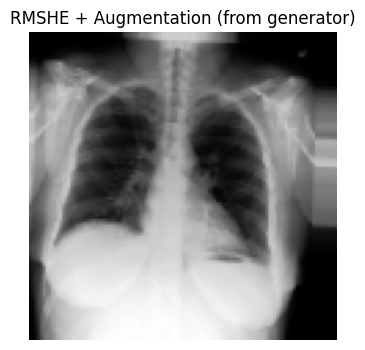

In [ ]:
# Pull one batch to check image if filter applied right
X_debug, Y_debug = next(train_gen)

print("X batch shape:", X_debug.shape)
print("Y batch shape:", Y_debug.shape)

import matplotlib.pyplot as plt

# Visualize first image in batch
img = X_debug[0]

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title("RMSHE + Augmentation (from generator)")
plt.axis("off")
plt.show()


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class counts from the directory
classes = train_gen.classes
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(classes),
    y=classes
)
class_weights = dict(enumerate(class_weights_array))
print("Class weights:", class_weights)

Class weights: {0: np.float64(1.4632734185966125), 1: np.float64(0.8800935550935551), 2: np.float64(0.5191623742948246), 3: np.float64(3.9342472118959106)}


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Input, Activation
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC



In [ ]:
import os
# Project configuration
DATA_DIR = 'COVID-19_Radiography_Dataset'
IMG_SIZE = (112,112)
BATCH_SIZE = 64
NUM_CLASSES = 4
CLASS_NAMES = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']
EPOCHS = 30
LEARNING_RATE = 0.001
RANDOM_SEED = 42

BASE_SAVE_DIR = '/content/drive/MyDrive/model stuff'

os.makedirs(f'{BASE_SAVE_DIR}/models', exist_ok=True)
os.makedirs(f'{BASE_SAVE_DIR}/figures', exist_ok=True)
os.makedirs(f'{BASE_SAVE_DIR}/results', exist_ok=True)
# Set random seeds
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
def build_cnn(num_classes, img_size):

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(*img_size, 3)),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    print(f"Simple CNN built with {model.count_params():,} parameters")
    return model

simple_cnn_model = build_cnn(NUM_CLASSES, IMG_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Simple CNN built with 421,828 parameters


In [ ]:
class SaveEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, save_freq, save_path):
        super().__init__()
        self.save_freq = save_freq
        self.save_path = save_path

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_freq == 0:
            filepath = self.save_path.format(epoch=epoch+1)
            self.model.save(filepath)
            print(f"\nModel saved at epoch {epoch+1} → {filepath}")


In [ ]:
def compile_model(model, learning_rate=0.001):
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
    )
    return model

def get_callbacks(model_name):
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),

        # Save BEST model only
        ModelCheckpoint(
            filepath=f'{BASE_SAVE_DIR}/models/{model_name}_best.keras',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),

        # Save every 5 epochs
        SaveEveryNEpochs(
            save_freq=5,
            save_path=f'{BASE_SAVE_DIR}/models/{model_name}_epoch{{epoch:02d}}.keras'
        ),

        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6
        ),

        CSVLogger(
            f'{BASE_SAVE_DIR}/results/{model_name}_training.csv',
            append=True
        )
    ]
    return callbacks


In [ ]:
# Compile Simple CNN
simple_cnn_model = compile_model(simple_cnn_model, LEARNING_RATE)

# Train Simple CNN
print("Training CNN...")
cnn_history = simple_cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks('simple_cnn'),
    class_weight=class_weights,
    verbose=1
)
print("CNN training completed!")

Training CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2314 - auc: 0.5115 - loss: 1.3675 - precision: 0.3067 - recall: 0.0045
Epoch 1: val_accuracy improved from -inf to 0.52847, saving model to /content/drive/MyDrive/model stuff/models/simple_cnn_best.keras
530/530 ━━━━━━━━━━━━━━━━━━━━ 813s 2s/step - accuracy: 0.2314 - auc: 0.5117 - loss: 1.3674 - precision: 0.3069 - recall: 0.0046 - val_accuracy: 0.5285 - val_auc: 0.7461 - val_loss: 1.2008 - val_precision: 0.4146 - val_recall: 0.0522 - learning_rate: 0.0010
Epoch 2/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4362 - auc: 0.7286 - loss: 1.0371 - precision: 0.5385 - recall: 0.0861
Epoch 2: val_accuracy improved from 0.52847 to 0.58790, saving model to /content/drive/MyDrive/model stuff/models/simple_cnn_best.keras
530/530 ━━━━━━━━━━━━━━━━━━━━ 780s 1s/step - accuracy: 0.4362 - auc: 0.7287 - loss: 1.0370 - precision: 0.5386 - recall: 0.0862 - val_accuracy: 0.5879 - val_auc: 0.8172 - val_loss: 1.0446 - val_precision:

for when crashes

In [ ]:
def get_last_epoch(model_dir, model_name):
    files = os.listdir(model_dir)
    epochs = []
    for f in files:
        if f.startswith(model_name + "_epoch"):
            e = int(f.split("epoch")[1].split(".")[0])
            epochs.append(e)
    return max(epochs) if epochs else 0


In [ ]:
MODEL_DIR = f'{BASE_SAVE_DIR}/models'
MODEL_NAME = 'simple_cnn'

best_model_path = f'{MODEL_DIR}/{MODEL_NAME}_epoch20.keras'

if os.path.exists(best_model_path):
    print("Loading saved model...")
    simple_cnn_model = tf.keras.models.load_model(best_model_path)
    initial_epoch = get_last_epoch(MODEL_DIR, MODEL_NAME)
    print(f"Resuming from epoch {initial_epoch}")
else:
    simple_cnn_model = build_cnn(NUM_CLASSES, IMG_SIZE)
    simple_cnn_model = compile_model(simple_cnn_model, LEARNING_RATE)
    initial_epoch = 0

cnn_history = simple_cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    initial_epoch=initial_epoch,
    validation_data=val_gen,
    callbacks=get_callbacks(MODEL_NAME),
    class_weight=class_weights,
    verbose=1
)


Loading saved model...
Resuming from epoch 20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 21/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7080 - auc: 0.9106 - loss: 0.6077 - precision: 0.7654 - recall: 0.6232
Epoch 21: val_accuracy improved from -inf to 0.84794, saving model to /content/drive/MyDrive/model stuff/models/simple_cnn_best.keras
530/530 ━━━━━━━━━━━━━━━━━━━━ 719s 1s/step - accuracy: 0.7080 - auc: 0.9106 - loss: 0.6077 - precision: 0.7654 - recall: 0.6232 - val_accuracy: 0.8479 - val_auc: 0.9687 - val_loss: 0.4162 - val_precision: 0.8640 - val_recall: 0.8306 - learning_rate: 0.0010
Epoch 22/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7026 - auc: 0.9070 - loss: 0.6221 - precision: 0.7625 - recall: 0.6123
Epoch 22: val_accuracy improved from 0.84794 to 0.84983, saving model to /content/drive/MyDrive/model stuff/models/simple_cnn_best.keras
530/530 ━━━━━━━━━━━━━━━━━━━━ 695s 1s/step - accuracy: 0.7026 - auc: 0.9070 - loss: 0.6221 - precision: 0.7625 - recall: 0.6123 - val_accuracy: 0.8498 - val_auc: 0.9698 - val_loss: 0.4340 - val_precis

In [ ]:
MODEL_DIR = f'{BASE_SAVE_DIR}/models'
MODEL_NAME = 'simple_cnn'

best_model_path = f'{MODEL_DIR}/{MODEL_NAME}_epoch25.keras'

if os.path.exists(best_model_path):
    print("Loading saved model...")
    simple_cnn_model = tf.keras.models.load_model(best_model_path)
    initial_epoch = get_last_epoch(MODEL_DIR, MODEL_NAME)
    print(f"Resuming from epoch {initial_epoch}")
else:
    simple_cnn_model = build_cnn(NUM_CLASSES, IMG_SIZE)
    simple_cnn_model = compile_model(simple_cnn_model, LEARNING_RATE)
    initial_epoch = 0

cnn_history = simple_cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    initial_epoch=initial_epoch,
    validation_data=val_gen,
    callbacks=get_callbacks(MODEL_NAME),
    class_weight=class_weights,
    verbose=1
)


Loading saved model...
Resuming from epoch 25
Epoch 26/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7237 - auc: 0.9174 - loss: 0.5867 - precision: 0.7778 - recall: 0.6369
Epoch 26: val_accuracy improved from -inf to 0.83637, saving model to /content/drive/MyDrive/model stuff/models/simple_cnn_best.keras
530/530 ━━━━━━━━━━━━━━━━━━━━ 743s 1s/step - accuracy: 0.7237 - auc: 0.9174 - loss: 0.5867 - precision: 0.7777 - recall: 0.6369 - val_accuracy: 0.8364 - val_auc: 0.9666 - val_loss: 0.4316 - val_precision: 0.8536 - val_recall: 0.8160 - learning_rate: 0.0010
Epoch 27/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7248 - auc: 0.9155 - loss: 0.5915 - precision: 0.7767 - recall: 0.6339
Epoch 27: val_accuracy improved from 0.83637 to 0.84901, saving model to /content/drive/MyDrive/model stuff/models/simple_cnn_best.keras
530/530 ━━━━━━━━━━━━━━━━━━━━ 720s 1s/step - accuracy: 0.7248 - auc: 0.9155 - loss: 0.5915 - precision: 0.7767 - recall: 0.6339 - val_accuracy: 0.8490 - v

fixing of plot of results since training was split

In [3]:
import pandas as pd

path = "/content/drive/MyDrive/model stuff/results/simple_cnn_training_rmshe.csv"
df = pd.read_csv(path)

df.tail()

,epoch,accuracy,auc,learning_rate,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
27,24,0.717888,0.913264,0.001,0.598093,0.771469,0.629481,0.872283,0.975926,0.373025,0.887899,0.847826
28,25,0.716057,0.913520,0.001,0.599875,0.774698,0.625642,0.855388,0.971993,0.393074,0.869437,0.837902
29,26,0.719365,0.914934,0.001,0.591941,0.774694,0.632227,0.866139,0.976468,0.358155,0.877948,0.853261
30,27,0.724089,0.915892,0.001,0.585942,0.776210,0.640111,0.859050,0.974944,0.374017,0.874432,0.840855
31,28,0.716825,0.914332,0.001,0.597641,0.773981,0.627325,0.858341,0.972705,0.387626,0.872234,0.842864


will be dropped due to double model training of these epochs but model crashed first time so will only use data from final model path

In [4]:
df = df.drop(index=[25,26,27,28])

In [5]:
import pandas as pd

path = "/content/drive/MyDrive/model stuff/results/simple_cnn_training_rmshe.csv"

# Reload CSV (important after drop)
df = pd.read_csv(path)

# New rows
new_rows = pd.DataFrame([
    {
        "epoch": 25,
        "accuracy": 0.7237,
        "auc": 0.9174,
        "learning_rate": 0.0010,
        "loss": 0.5867,
        "precision": 0.7777,
        "recall": 0.6369,
        "val_accuracy": 0.8364,
        "val_auc": 0.9666,
        "val_loss": 0.4316,
        "val_precision": 0.8536,
        "val_recall": 0.8160,
    },
    {
        "epoch": 26,
        "accuracy": 0.7248,
        "auc": 0.9155,
        "learning_rate": 0.0010,
        "loss": 0.5915,
        "precision": 0.7767,
        "recall": 0.6339,
        "val_accuracy": 0.8490,
        "val_auc": 0.9678,
        "val_loss": 0.4327,
        "val_precision": 0.8676,
        "val_recall": 0.8227,
    },
    {
        "epoch": 27,
        "accuracy": 0.7200,
        "auc": 0.9143,
        "learning_rate": 0.0010,
        "loss": 0.5933,
        "precision": 0.7738,
        "recall": 0.6287,
        "val_accuracy": 0.8575,
        "val_auc": 0.9729,
        "val_loss": 0.3884,
        "val_precision": 0.8753,
        "val_recall": 0.8403,
    },
    {
        "epoch": 28,
        "accuracy": 0.7244,
        "auc": 0.9166,
        "learning_rate": 0.0010,
        "loss": 0.5878,
        "precision": 0.7741,
        "recall": 0.6376,
        "val_accuracy": 0.8439,
        "val_auc": 0.9669,
        "val_loss": 0.4285,
        "val_precision": 0.8585,
        "val_recall": 0.8310,
    },
    {
        "epoch": 29,
        "accuracy": 0.7286,
        "auc": 0.9179,
        "learning_rate": 0.0010,
        "loss": 0.5907,
        "precision": 0.7823,
        "recall": 0.6403,
        "val_accuracy": 0.8696,
        "val_auc": 0.9767,
        "val_loss": 0.3723,
        "val_precision": 0.8895,
        "val_recall": 0.8451,
    },
])

# Append
df = pd.concat([df, new_rows], ignore_index=True)

# Optional: sort by epoch (recommended)
df = df.sort_values("epoch").reset_index(drop=True)

# Save back to Drive
df.to_csv(path, index=False)

df.tail()


,epoch,accuracy,auc,learning_rate,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
32,27,0.720000,0.914300,0.001,0.593300,0.773800,0.628700,0.857500,0.972900,0.388400,0.875300,0.840300
33,27,0.724089,0.915892,0.001,0.585942,0.776210,0.640111,0.859050,0.974944,0.374017,0.874432,0.840855
34,28,0.716825,0.914332,0.001,0.597641,0.773981,0.627325,0.858341,0.972705,0.387626,0.872234,0.842864
35,28,0.724400,0.916600,0.001,0.587800,0.774100,0.637600,0.843900,0.966900,0.428500,0.858500,0.831000
36,29,0.728600,0.917900,0.001,0.590700,0.782300,0.640300,0.869600,0.976700,0.372300,0.889500,0.845100


In [6]:
class CSVHistory:
    def __init__(self, df):
        self.history = {
            "accuracy": df["accuracy"].values,
            "val_accuracy": df["val_accuracy"].values,
            "loss": df["loss"].values,
            "val_loss": df["val_loss"].values,
            "precision": df["precision"].values,
            "val_precision": df["val_precision"].values,
            "recall": df["recall"].values,
            "val_recall": df["val_recall"].values,
        }

csv_history = CSVHistory(df)

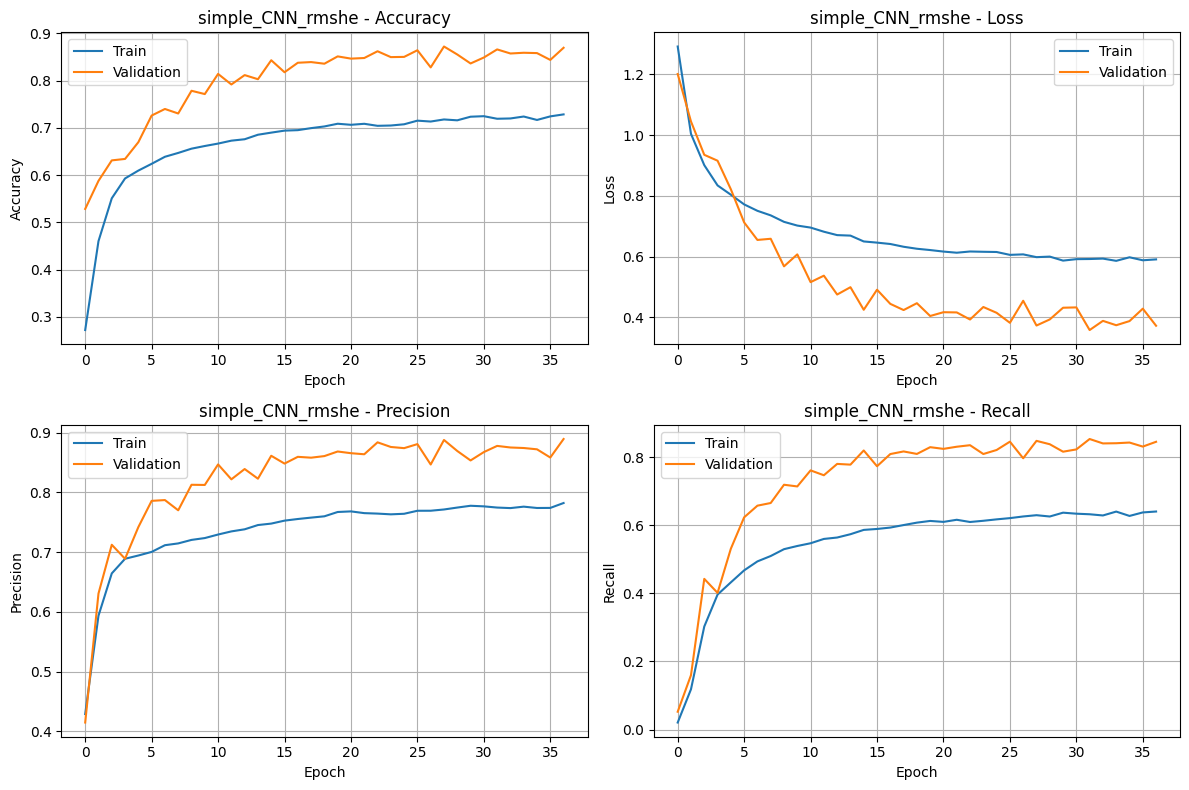

In [10]:
import matplotlib.pyplot as plt
def plot_training_history(history, model_name):
    """Plot training history for a model"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
    axes[0, 0].set_title(f'{model_name} - Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train')
    axes[0, 1].plot(history.history['val_loss'], label='Validation')
    axes[0, 1].set_title(f'{model_name} - Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train')
    axes[1, 0].plot(history.history['val_precision'], label='Validation')
    axes[1, 0].set_title(f'{model_name} - Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Train')
    axes[1, 1].plot(history.history['val_recall'], label='Validation')
    axes[1, 1].set_title(f'{model_name} - Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot training histories
plot_training_history(csv_history, 'simple_CNN_rmshe')

### Testing of model with CLAHE (112x112)

In [ ]:
!pip install image-enhancement

In [ ]:
import cv2 as cv
import numpy as np
from image_enhancement import image_enhancement

import cv2 as cv
import numpy as np

def clahe_preprocess(img):
    """
    img: RGB image from ImageDataGenerator (float or uint8)
    returns: RGB image after CLAHE, float32
    """

    # Ensure uint8
    img = img.astype(np.uint8)

    # Convert RGB → LAB (CLAHE works best on luminance)
    lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)

    l, a, b = cv.split(lab)

    # Apply CLAHE to L channel only
    clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)

    # Merge back
    lab_clahe = cv.merge((l_clahe, a, b))

    # Convert LAB → RGB
    img_clahe = cv.cvtColor(lab_clahe, cv.COLOR_LAB2RGB)

    return img_clahe.astype(np.float32)



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (112,112)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    preprocessing_function=clahe_preprocess,  # RMSHE FIRST
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    validation_split=0.2
)


val_datagen = ImageDataGenerator(
    preprocessing_function=clahe_preprocess,  # RMSHE HERE
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    '/content/COVID-19_Radiography_Dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = val_datagen.flow_from_directory(
    '/content/COVID-19_Radiography_Dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)


Found 33866 images belonging to 4 classes.
Found 8464 images belonging to 4 classes.


X batch shape: (64, 112, 112, 3)
Y batch shape: (64, 4)


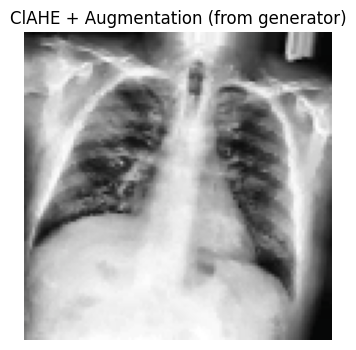

In [ ]:
# Pull one batch to check image if filter applied right
X_debug, Y_debug = next(train_gen)

print("X batch shape:", X_debug.shape)
print("Y batch shape:", Y_debug.shape)

import matplotlib.pyplot as plt

# Visualize first image in batch
img = X_debug[0]

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title("ClAHE + Augmentation (from generator)")
plt.axis("off")
plt.show()


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class counts from the directory
classes = train_gen.classes
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(classes),
    y=classes
)
class_weights = dict(enumerate(class_weights_array))
print("Class weights:", class_weights)

Class weights: {0: np.float64(1.4632734185966125), 1: np.float64(0.8800935550935551), 2: np.float64(0.5191623742948246), 3: np.float64(3.9342472118959106)}


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Input, Activation
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC



In [ ]:
import os
# Project configuration
DATA_DIR = 'COVID-19_Radiography_Dataset'
IMG_SIZE = (112,112)
BATCH_SIZE = 64
NUM_CLASSES = 4
CLASS_NAMES = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']
EPOCHS = 30
LEARNING_RATE = 0.001
RANDOM_SEED = 42

BASE_SAVE_DIR = '/content/drive/MyDrive/model stuff'

os.makedirs(f'{BASE_SAVE_DIR}/models', exist_ok=True)
os.makedirs(f'{BASE_SAVE_DIR}/figures', exist_ok=True)
os.makedirs(f'{BASE_SAVE_DIR}/results', exist_ok=True)
# Set random seeds
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
def build_cnn(num_classes, img_size):

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(*img_size, 3)),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    print(f"Simple CNN built with {model.count_params():,} parameters")
    return model

simple_cnn_model = build_cnn(NUM_CLASSES, IMG_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Simple CNN built with 421,828 parameters


In [ ]:
class SaveEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, save_freq, save_path):
        super().__init__()
        self.save_freq = save_freq
        self.save_path = save_path

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_freq == 0:
            filepath = self.save_path.format(epoch=epoch+1)
            self.model.save(filepath)
            print(f"\nModel saved at epoch {epoch+1} → {filepath}")


In [ ]:
def compile_model(model, learning_rate=0.001):
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
    )
    return model

def get_callbacks(model_name):
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),

        # Save BEST model only
        ModelCheckpoint(
            filepath=f'{BASE_SAVE_DIR}/models/{model_name}_best.keras',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),

        # Save every 5 epochs
        SaveEveryNEpochs(
            save_freq=5,
            save_path=f'{BASE_SAVE_DIR}/models/{model_name}_epoch{{epoch:02d}}.keras'
        ),

        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6
        ),

        CSVLogger(
            f'{BASE_SAVE_DIR}/results/{model_name}_training.csv',
            append=True
        )
    ]
    return callbacks


In [ ]:
# Compile Simple CNN
simple_cnn_model = compile_model(simple_cnn_model, LEARNING_RATE)

# Train Simple CNN
print("Training CNN...")
cnn_history = simple_cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks('simple_cnn'),
    class_weight=class_weights,
    verbose=1
)
print("CNN training completed!")

Training CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.2270 - auc: 0.5069 - loss: 1.3689 - precision: 0.2375 - recall: 0.0039
Epoch 1: val_accuracy improved from -inf to 0.29797, saving model to /content/drive/MyDrive/model stuff/models/simple_cnn_best.keras
530/530 ━━━━━━━━━━━━━━━━━━━━ 213s 382ms/step - accuracy: 0.2271 - auc: 0.5071 - loss: 1.3687 - precision: 0.2378 - recall: 0.0039 - val_accuracy: 0.2980 - val_auc: 0.6223 - val_loss: 1.2948 - val_precision: 0.3593 - val_recall: 0.0468 - learning_rate: 0.0010
Epoch 2/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.3783 - auc: 0.7031 - loss: 1.0548 - precision: 0.4939 - recall: 0.0580
Epoch 2: val_accuracy improved from 0.29797 to 0.41895, saving model to /content/drive/MyDrive/model stuff/models/simple_cnn_best.keras
530/530 ━━━━━━━━━━━━━━━━━━━━ 193s 363ms/step - accuracy: 0.3783 - auc: 0.7031 - loss: 1.0547 - precision: 0.4939 - recall: 0.0580 - val_accuracy: 0.4190 - val_auc: 0.7341 - val_loss: 1.1417 - va

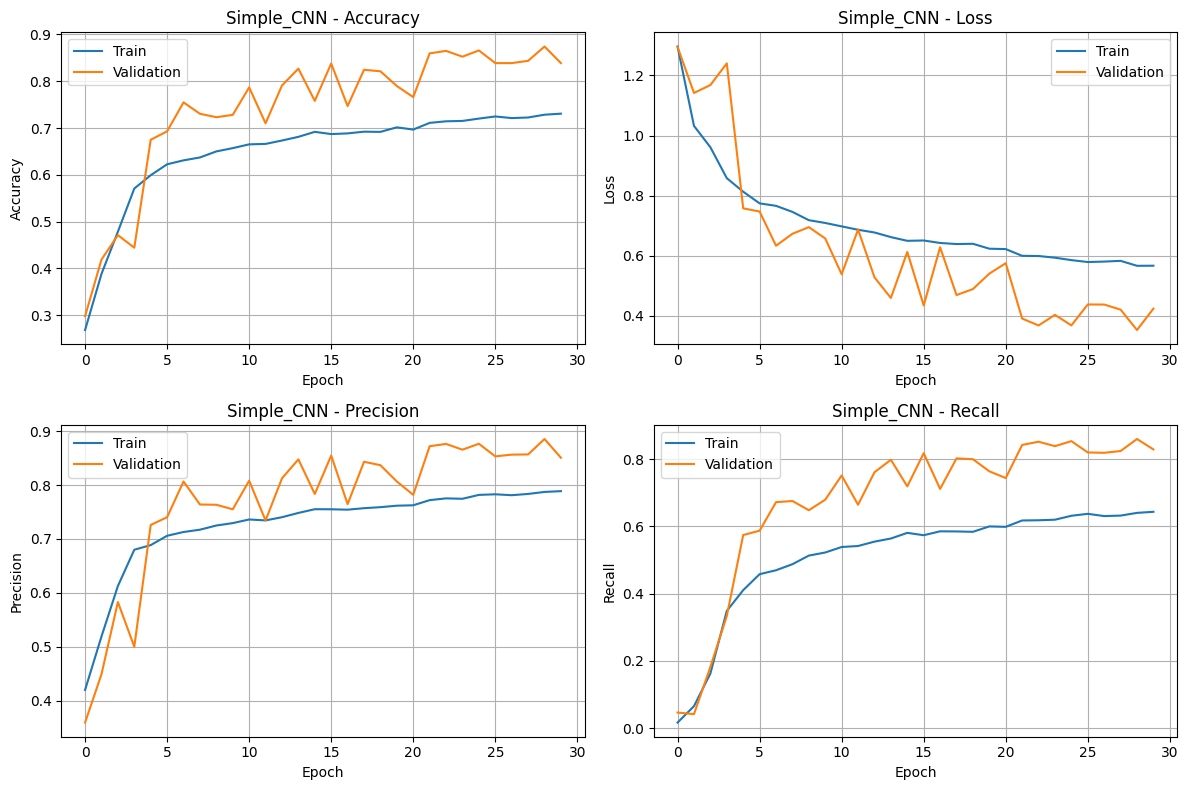

In [ ]:
def plot_training_history(history, model_name):
    """Plot training history for a model"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
    axes[0, 0].set_title(f'{model_name} - Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train')
    axes[0, 1].plot(history.history['val_loss'], label='Validation')
    axes[0, 1].set_title(f'{model_name} - Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train')
    axes[1, 0].plot(history.history['val_precision'], label='Validation')
    axes[1, 0].set_title(f'{model_name} - Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Train')
    axes[1, 1].plot(history.history['val_recall'], label='Validation')
    axes[1, 1].set_title(f'{model_name} - Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.savefig(f'figures/{model_name}_training_history.png', dpi=150)
    plt.show()

# Plot training histories
plot_training_history(cnn_history, 'Simple_CNN')

for when crashes

In [ ]:
def get_last_epoch(model_dir, model_name):
    files = os.listdir(model_dir)
    epochs = []
    for f in files:
        if f.startswith(model_name + "_epoch"):
            e = int(f.split("epoch")[1].split(".")[0])
            epochs.append(e)
    return max(epochs) if epochs else 0


In [ ]:
MODEL_DIR = f'{BASE_SAVE_DIR}/models'
MODEL_NAME = 'simple_cnn'

best_model_path = f'{MODEL_DIR}/{MODEL_NAME}_best.keras'

if os.path.exists(best_model_path):
    print("Loading saved model...")
    simple_cnn_model = tf.keras.models.load_model(best_model_path)
    initial_epoch = get_last_epoch(MODEL_DIR, MODEL_NAME)
    print(f"Resuming from epoch {initial_epoch}")
else:
    simple_cnn_model = build_cnn(NUM_CLASSES, IMG_SIZE)
    simple_cnn_model = compile_model(simple_cnn_model, LEARNING_RATE)
    initial_epoch = 0

cnn_history = simple_cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    initial_epoch=initial_epoch,
    validation_data=val_gen,
    callbacks=get_callbacks(MODEL_NAME),
    class_weight=class_weights,
    verbose=1
)


In [ ]:
cnn_history = simple_cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks('simple_cnn'),
    class_weight=class_weights,
    verbose=1
)


### Testing of model with LPT+DWT (112x112)

In [ ]:
from skimage.io import imread
from skimage.transform import resize, warp_polar
from skimage.color import rgb2gray
import numpy as np
import pywt
import cv2 as cv

def lpt_dwt_preprocess(img):
    """
    img: RGB image (H,W,3) from ImageDataGenerator
    returns: RGB image (H,W,3)
    """

    # Convert to grayscale
    gray = cv.cvtColor(img.astype(np.uint8), cv.COLOR_RGB2GRAY)

    # Normalize
    gray = gray.astype(np.float32) / 255.0

    # Log-Polar Transform
    gray = warp_polar(
        gray,
        radius=gray.shape[0] // 2,
        output_shape=gray.shape,
        scaling='log'
    )

    # DWT
    coeffs = pywt.wavedec2(gray, wavelet="haar", level=1)
    horizontal_detail = coeffs[1][1]

    # Resize back
    horizontal_detail = cv.resize(
        horizontal_detail,
        (gray.shape[1], gray.shape[0])
    )

    # Normalize again
    horizontal_detail = cv.normalize(
        horizontal_detail, None, 0, 255, cv.NORM_MINMAX
    ).astype(np.uint8)

    #  convert to 3 channels
    rgb = cv.cvtColor(horizontal_detail, cv.COLOR_GRAY2RGB)

    return rgb.astype(np.float32)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (112,112)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    preprocessing_function=lpt_dwt_preprocess,  #  HERE
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    validation_split=0.2
)


val_datagen = ImageDataGenerator(
    preprocessing_function=lpt_dwt_preprocess,  #  HERE
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    '/content/COVID-19_Radiography_Dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = val_datagen.flow_from_directory(
    '/content/COVID-19_Radiography_Dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)


Found 33866 images belonging to 4 classes.
Found 8464 images belonging to 4 classes.


X batch shape: (64, 112, 112, 3)
Y batch shape: (64, 4)


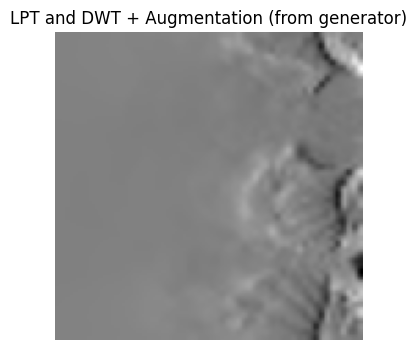

In [ ]:
# Pull one batch to check image if filter applied right
X_debug, Y_debug = next(train_gen)

print("X batch shape:", X_debug.shape)
print("Y batch shape:", Y_debug.shape)

import matplotlib.pyplot as plt

# Visualize first image in batch
img = X_debug[0]

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title("LPT and DWT + Augmentation (from generator)")
plt.axis("off")
plt.show()


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class counts from the directory
classes = train_gen.classes
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(classes),
    y=classes
)
class_weights = dict(enumerate(class_weights_array))
print("Class weights:", class_weights)

Class weights: {0: np.float64(1.4632734185966125), 1: np.float64(0.8800935550935551), 2: np.float64(0.5191623742948246), 3: np.float64(3.9342472118959106)}


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Input, Activation
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC



In [ ]:
import os
# Project configuration
DATA_DIR = 'COVID-19_Radiography_Dataset'
IMG_SIZE = (112,112)
BATCH_SIZE = 64
NUM_CLASSES = 4
CLASS_NAMES = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']
EPOCHS = 30
LEARNING_RATE = 0.001
RANDOM_SEED = 42

BASE_SAVE_DIR = '/content/drive/MyDrive/model stuff'

os.makedirs(f'{BASE_SAVE_DIR}/models', exist_ok=True)
os.makedirs(f'{BASE_SAVE_DIR}/figures', exist_ok=True)
os.makedirs(f'{BASE_SAVE_DIR}/results', exist_ok=True)
# Set random seeds
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
def build_cnn(num_classes, img_size):

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(*img_size, 3)),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    print(f"Simple CNN built with {model.count_params():,} parameters")
    return model

simple_cnn_model = build_cnn(NUM_CLASSES, IMG_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Simple CNN built with 421,828 parameters


In [ ]:
class SaveEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, save_freq, save_path):
        super().__init__()
        self.save_freq = save_freq
        self.save_path = save_path

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_freq == 0:
            filepath = self.save_path.format(epoch=epoch+1)
            self.model.save(filepath)
            print(f"\nModel saved at epoch {epoch+1} → {filepath}")


In [ ]:
def compile_model(model, learning_rate=0.001):
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
    )
    return model

def get_callbacks(model_name):
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),

        # Save BEST model only
        ModelCheckpoint(
            filepath=f'{BASE_SAVE_DIR}/models/{model_name}_best.keras',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),

        # Save every 5 epochs
        SaveEveryNEpochs(
            save_freq=5,
            save_path=f'{BASE_SAVE_DIR}/models/{model_name}_epoch{{epoch:02d}}.keras'
        ),

        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6
        ),

        CSVLogger(
            f'{BASE_SAVE_DIR}/results/{model_name}_training.csv',
            append=True
        )
    ]
    return callbacks


In [ ]:
# Compile Simple CNN
simple_cnn_model = compile_model(simple_cnn_model, LEARNING_RATE)

# Train Simple CNN
print("Training CNN...")
cnn_history = simple_cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks('simple_cnn'),
    class_weight=class_weights,
    verbose=1
)
print("CNN training completed!")

Training CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.3251 - auc: 0.5696 - loss: 1.3815 - precision: 0.3992 - recall: 3.4500e-04
Epoch 1: val_accuracy improved from -inf to 0.28403, saving model to /content/drive/MyDrive/model stuff/models/simple_cnn_best.keras
530/530 ━━━━━━━━━━━━━━━━━━━━ 297s 540ms/step - accuracy: 0.3250 - auc: 0.5695 - loss: 1.3815 - precision: 0.3992 - recall: 3.4446e-04 - val_accuracy: 0.2840 - val_auc: 0.3466 - val_loss: 1.3897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.1865 - auc: 0.4541 - loss: 1.3867 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.28403
530/530 ━━━━━━━━━━━━━━━━━━━━ 278s 524ms/step - accuracy: 0.1865 - auc: 0.4541 - loss: 1.3867 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2840 - val_auc: 0.5227 - val_loss: 1.3868 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - le

for when crashes

In [ ]:
def get_last_epoch(model_dir, model_name):
    files = os.listdir(model_dir)
    epochs = []
    for f in files:
        if f.startswith(model_name + "_epoch"):
            e = int(f.split("epoch")[1].split(".")[0])
            epochs.append(e)
    return max(epochs) if epochs else 0


In [ ]:
MODEL_DIR = f'{BASE_SAVE_DIR}/models'
MODEL_NAME = 'simple_cnn'

best_model_path = f'{MODEL_DIR}/{MODEL_NAME}_epoch20.keras'

if os.path.exists(best_model_path):
    print("Loading saved model...")
    simple_cnn_model = tf.keras.models.load_model(best_model_path)
    initial_epoch = get_last_epoch(MODEL_DIR, MODEL_NAME)
    print(f"Resuming from epoch {initial_epoch}")
else:
    simple_cnn_model = build_cnn(NUM_CLASSES, IMG_SIZE)
    simple_cnn_model = compile_model(simple_cnn_model, LEARNING_RATE)
    initial_epoch = 0

cnn_history = simple_cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    initial_epoch=initial_epoch,
    validation_data=val_gen,
    callbacks=get_callbacks(MODEL_NAME),
    class_weight=class_weights,
    verbose=1
)


Loading saved model...
Resuming from epoch 20
Epoch 21/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.1743 - auc: 0.4184 - loss: 1.3933 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 21: val_accuracy improved from -inf to 0.17084, saving model to /content/drive/MyDrive/model stuff/models/simple_cnn_best.keras
530/530 ━━━━━━━━━━━━━━━━━━━━ 305s 554ms/step - accuracy: 0.1743 - auc: 0.4184 - loss: 1.3933 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1708 - val_auc: 0.5000 - val_loss: 1.3845 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 22/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.2127 - auc: 0.4693 - loss: 1.3937 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 22: val_accuracy did not improve from 0.17084
530/530 ━━━━━━━━━━━━━━━━━━━━ 279s 527ms/step - accuracy: 0.2127 - auc: 0.4693 - loss: 1.3937 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1708 - val_auc: 0.5000 - val_loss: 1.3843

fixing of plot of results since training was split

In [11]:
import pandas as pd

path = "/content/drive/MyDrive/model stuff/results/simple_cnn_training_lpt.csv"
df = pd.read_csv(path)

df.tail()

,epoch,accuracy,auc,learning_rate,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
28,25,0.236461,0.488328,0.001,1.386417,0.0,0.0,0.284026,0.500000,1.385387,0.0,0.0
29,26,0.316896,0.600160,0.001,1.386343,0.0,0.0,0.063563,0.375709,1.391727,0.0,0.0
30,27,0.085484,0.391012,0.001,1.386395,0.0,0.0,0.063563,0.375709,1.387566,0.0,0.0
31,28,0.101341,0.414287,0.001,1.386388,0.0,0.0,0.481569,0.601607,1.384025,0.0,0.0
32,29,0.255979,0.592020,0.001,1.386396,0.0,0.0,0.063563,0.375709,1.387608,0.0,0.0


In [14]:
len(df)

33

In [12]:
class CSVHistory:
    def __init__(self, df):
        self.history = {
            "accuracy": df["accuracy"].values,
            "val_accuracy": df["val_accuracy"].values,
            "loss": df["loss"].values,
            "val_loss": df["val_loss"].values,
            "precision": df["precision"].values,
            "val_precision": df["val_precision"].values,
            "recall": df["recall"].values,
            "val_recall": df["val_recall"].values,
        }

csv_history = CSVHistory(df)

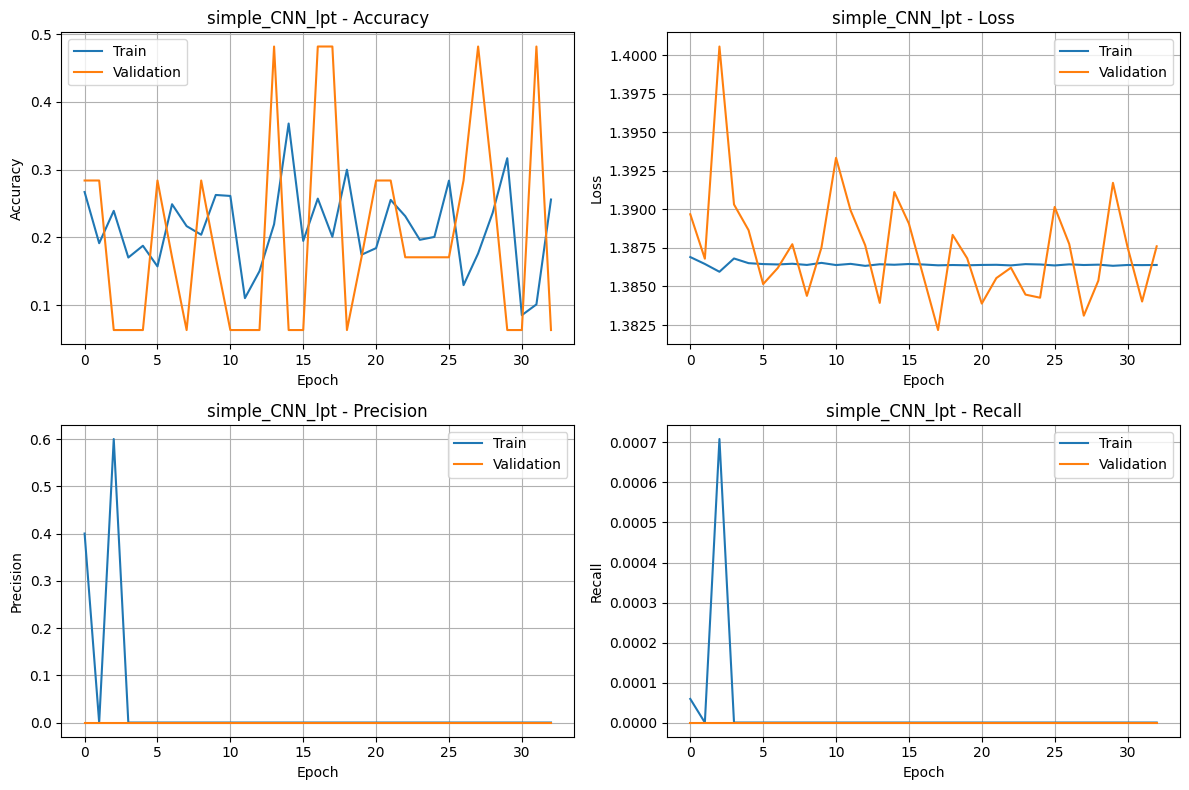

In [13]:
import matplotlib.pyplot as plt
def plot_training_history(history, model_name):
    """Plot training history for a model"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
    axes[0, 0].set_title(f'{model_name} - Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train')
    axes[0, 1].plot(history.history['val_loss'], label='Validation')
    axes[0, 1].set_title(f'{model_name} - Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train')
    axes[1, 0].plot(history.history['val_precision'], label='Validation')
    axes[1, 0].set_title(f'{model_name} - Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Train')
    axes[1, 1].plot(history.history['val_recall'], label='Validation')
    axes[1, 1].set_title(f'{model_name} - Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot training histories
plot_training_history(csv_history, 'simple_CNN_lpt')

Many epochs show zero precision and recall because the model failed to predict any positive samples, meaning all predictions collapsed to the negative class. This indicates that, despite non-zero accuracy and AUC, the CNN was not effectively learning discriminative features from the LPT and DWT–transformed inputs and was instead minimizing loss by avoiding positive predictions.

### Testing of model with 1 channel (since black and white so might retain info) and 112x112 size,
image sizes from above is 112 and below model will take 112

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (112, 112)
BATCH_SIZE = 64

# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
    validation_split=0.2  # 20% validation split
)

train_gen = train_datagen.flow_from_directory(
    'COVID-19_Radiography_Dataset',
    target_size=IMG_SIZE,
    color_mode='grayscale',   #added
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)


val_gen = train_datagen.flow_from_directory(
    'COVID-19_Radiography_Dataset',
    target_size=IMG_SIZE,
    color_mode='grayscale',   # added
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)


Found 33866 images belonging to 4 classes.
Found 8464 images belonging to 4 classes.


In [ ]:
x_batch, y_batch = next(train_gen)
print(x_batch.shape)

(64, 112, 112, 1)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class counts from the directory
classes = train_gen.classes
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(classes),
    y=classes
)
class_weights = dict(enumerate(class_weights_array))
print("Class weights:", class_weights)

Class weights: {0: np.float64(1.4632734185966125), 1: np.float64(0.8800935550935551), 2: np.float64(0.5191623742948246), 3: np.float64(3.9342472118959106)}


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Input, Activation
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC
import os


In [ ]:
# Project configuration
DATA_DIR = 'COVID-19_Radiography_Dataset'
IMG_SIZE = (112, 112)
BATCH_SIZE = 64
NUM_CLASSES = 4
CLASS_NAMES = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']
EPOCHS = 30
LEARNING_RATE = 0.001
RANDOM_SEED = 42

# Create directories for saving results
os.makedirs('models', exist_ok=True)
os.makedirs('figures', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Set random seeds
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
def build_cnn(num_classes, img_size):

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(*img_size, 1)), # CHANGED
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    print(f"Simple CNN built with {model.count_params():,} parameters")
    return model

simple_cnn_model = build_cnn(NUM_CLASSES, IMG_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Simple CNN built with 421,252 parameters


In [ ]:
def compile_model(model, learning_rate=0.001):
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
    )
    return model

def get_callbacks(model_name):
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
        ModelCheckpoint(f'models/best_{model_name}.keras', monitor='val_accuracy', save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
        CSVLogger(f'results/{model_name}_training.csv')
    ]
    return callbacks

In [ ]:
# Compile Simple CNN
simple_cnn_model = compile_model(simple_cnn_model, LEARNING_RATE)

# Train Simple CNN
print("Training CNN...")
cnn_history = simple_cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks('simple_cnn'),
    class_weight=class_weights,
    verbose=1
)
print("CNN training completed!")

Training CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 137s 237ms/step - accuracy: 0.3158 - auc: 0.6020 - loss: 1.3595 - precision: 0.2318 - recall: 0.0083 - val_accuracy: 0.3205 - val_auc: 0.6707 - val_loss: 1.2648 - val_precision: 0.3460 - val_recall: 0.0548 - learning_rate: 0.0010
Epoch 2/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 112s 212ms/step - accuracy: 0.4234 - auc: 0.7222 - loss: 1.0688 - precision: 0.5195 - recall: 0.0857 - val_accuracy: 0.4722 - val_auc: 0.7453 - val_loss: 1.1426 - val_precision: 0.5329 - val_recall: 0.0987 - learning_rate: 0.0010
Epoch 3/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 114s 215ms/step - accuracy: 0.5556 - auc: 0.8022 - loss: 0.9052 - precision: 0.6523 - recall: 0.2970 - val_accuracy: 0.5959 - val_auc: 0.8198 - val_loss: 1.0088 - val_precision: 0.6799 - val_recall: 0.3973 - learning_rate: 0.0010
Epoch 4/30
530/530 ━━━━━━━━━━━━━━━━━━━━ 112s 212ms/step - accuracy: 0.6000 - auc: 0.8408 - loss: 0.8246 - precision: 0.6921 - recall: 0.4307 - val_accuracy: 0.6116 - val_auc: 0.8491 - val_lo

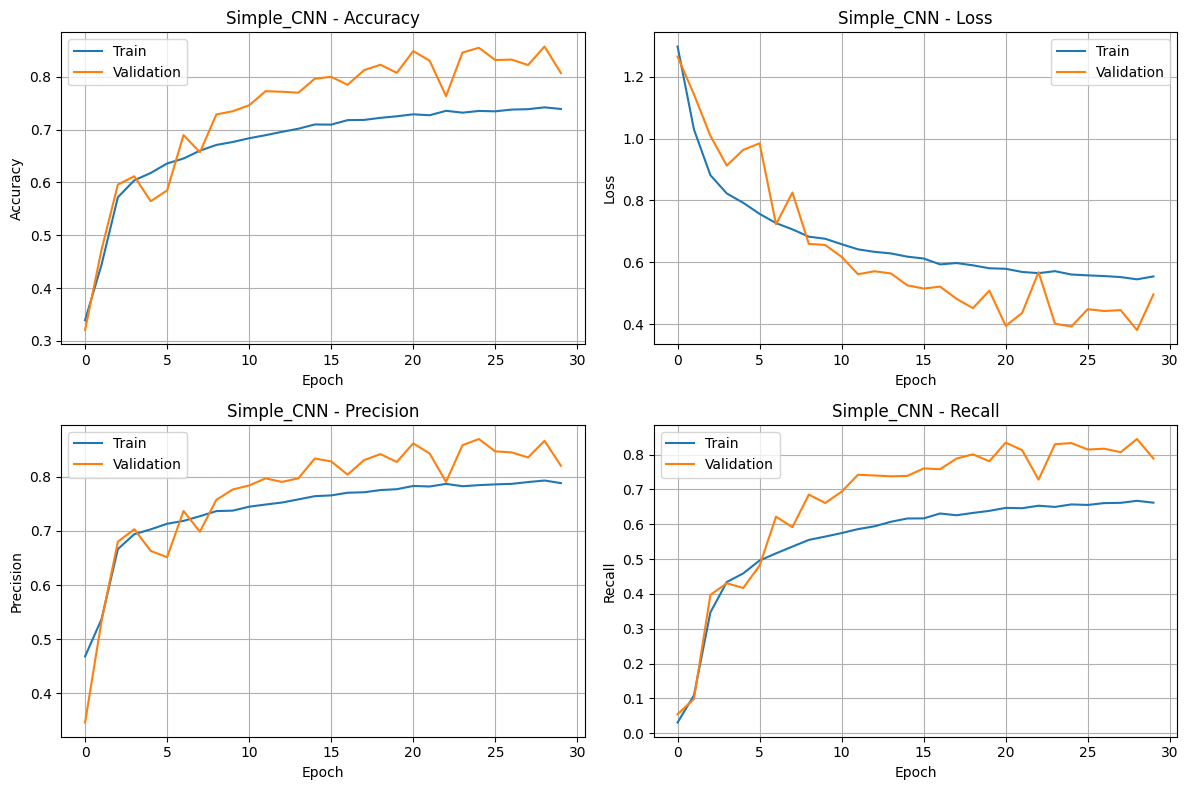

In [ ]:
def plot_training_history(history, model_name):
    """Plot training history for a model"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
    axes[0, 0].set_title(f'{model_name} - Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train')
    axes[0, 1].plot(history.history['val_loss'], label='Validation')
    axes[0, 1].set_title(f'{model_name} - Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train')
    axes[1, 0].plot(history.history['val_precision'], label='Validation')
    axes[1, 0].set_title(f'{model_name} - Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Train')
    axes[1, 1].plot(history.history['val_recall'], label='Validation')
    axes[1, 1].set_title(f'{model_name} - Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.savefig(f'figures/{model_name}_training_history.png', dpi=150)
    plt.show()

# Plot training histories
plot_training_history(cnn_history, 'Simple_CNN')